In [2]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
data = datasets.load_files('/content/drive/MyDrive/Assignment/enron_with_categories',encoding='utf-8')
for keys in data.keys() :
    print(keys)
print(list(data.target_names))
print(len(data.data))

data
filenames
target_names
target
DESCR
['Company Business', 'Document Editing', 'Employment Arrangements', 'Logistic Arrangements', 'Personal', 'Purely Personal']
1663


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Converting Data Into Table Form
df = pd.DataFrame(data.data)
df["Email"] = df


In [4]:
print(df.loc[1][0])

Message-ID: <16695482.1075846172580.JavaMail.evans@thyme>
Date: Fri, 1 Sep 2000 04:25:00 -0700 (PDT)
From: steven.kean@enron.com
To: terence.thorn@enron.com
Subject: Linda Jenkins on "Jerry's Show" Monday
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Steven J Kean
X-To: Terence H Thorn
X-cc: 
X-bcc: 
X-Folder: \Steven_Kean_Dec2000_1\Notes Folders\All documents
X-Origin: KEAN-S
X-FileName: skean.nsf

fyi
---------------------- Forwarded by Steven J Kean/NA/Enron on 09/01/2000 
11:24 AM ---------------------------

           Public Relations	
	

From: public-relations on 09/01/2000 10:42 AM
Sent by: Public Relations
To: All Enron Houston
cc:  
Subject: Linda Jenkins on "Jerry's Show" Monday


 What are you doing on Labor Day? 
 
In between the hamburgers, hotdogs, homemade ice cream and occasional dip in 
the pool that many of you will undoubtedly be enjoying Monday, be sure to 
take a few minutes to turn your TV set to the Jerry Le

In [5]:
# Using email library to import subject and body of the email
import email
message = df.loc[1][0]
e = email.message_from_string(message)
e.items()

[('Message-ID', '<16695482.1075846172580.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 1 Sep 2000 04:25:00 -0700 (PDT)'),
 ('From', 'steven.kean@enron.com'),
 ('To', 'terence.thorn@enron.com'),
 ('Subject', 'Linda Jenkins on "Jerry\'s Show" Monday'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Steven J Kean'),
 ('X-To', 'Terence H Thorn'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', '\\Steven_Kean_Dec2000_1\\Notes Folders\\All documents'),
 ('X-Origin', 'KEAN-S'),
 ('X-FileName', 'skean.nsf')]

In [6]:
# Body of the email
e.get_payload()

'fyi\n---------------------- Forwarded by Steven J Kean/NA/Enron on 09/01/2000 \n11:24 AM ---------------------------\n\n           Public Relations\t\n\t\n\nFrom: public-relations on 09/01/2000 10:42 AM\nSent by: Public Relations\nTo: All Enron Houston\ncc:  \nSubject: Linda Jenkins on "Jerry\'s Show" Monday\n\n\n What are you doing on Labor Day? \n \nIn between the hamburgers, hotdogs, homemade ice cream and occasional dip in \nthe pool that many of you will undoubtedly be enjoying Monday, be sure to \ntake a few minutes to turn your TV set to the Jerry Lewis Labor Day Muscular \nDystrophy (MDA) Telethon on NBC.  At 1:10 p.m., Enron\'s own Linda Jenkins \nwill present a $100,000 check to Jerry\'s Houston team.  The donation, which \nwill benefit research for ALS (amyotrophic lateral sclerosis, also known as \nLou Gehrig\'s disease -- the disease Linda has been living with for the past \nthree years), was raised by devoted friends and volunteers at the Enron/MDA \nBeach Bowl held in J

In [7]:
# Function to get body of the each eamils
def get_body(messages):
    colum = []
    for message in messages:
        e = email.message_from_string(message)
        colum.append(e.get_payload())
    return colum

In [8]:
# Function to get subject of each email
def get_subject(messages):
    colum = []
    for message in messages:
        e = email.message_from_string(message)
        colum.append(e.get("Subject"))
    return colum

In [9]:
df["Subject"] = get_subject(df[0])
df["Body"]= get_body(df[0])
df["Class"] = data.target
df.drop([0],axis=1, inplace=True)

In [11]:
df.head()

,Email,Subject,Body,Class
0,Message-ID: <6301214.1075847601810.JavaMail.ev...,COMPENSATION,could you look into this for me?\n------------...,2
1,Message-ID: <16695482.1075846172580.JavaMail.e...,"Linda Jenkins on ""Jerry's Show"" Monday",fyi\n---------------------- Forwarded by Steve...,0
2,Message-ID: <569949.1075846177167.JavaMail.eva...,Re: Update -- Project 100,It's fine with me.\n\n\n\n\tMary Clark\n\t09/2...,0
3,Message-ID: <20011465.1075847624589.JavaMail.e...,Re: Senator Feinstein,yes\n\n\n\n\tLinda Robertson\n\t03/01/2001 07:...,0
4,Message-ID: <3850175.1075863427087.JavaMail.ev...,FW: Friday?,"Krishna,\n\nFYI\n\nVince\n\n -----Original Mes...",4


In [12]:
#Counting each classes
df['Class'].value_counts()

0    834
3    476
1    143
4    100
2     74
5     36
Name: Class, dtype: int64

In [13]:
# checking For null
df.isnull().sum()

Email      0
Subject    0
Body       0
Class      0
dtype: int64

In [14]:
# checking for duplicates
df.duplicated().sum()

0

In [15]:
# Combining subject and body of the email
df['text'] = df['Subject'] + " " + df['Body']

In [16]:
# drop the columns 'subject' and 'body'
df.drop(['Subject','Body','Email'], axis=1, inplace=True)

In [17]:
# checking for duplicates again
df.duplicated().sum()

47

In [18]:
# dropping duplicates 
df.drop_duplicates(keep='first')

,Class,text
0,2,COMPENSATION could you look into this for me?\...
1,0,"Linda Jenkins on ""Jerry's Show"" Monday fyi\n--..."
2,0,Re: Update -- Project 100 It's fine with me.\n...
3,0,Re: Senator Feinstein yes\n\n\n\n\tLinda Rober...
4,4,"FW: Friday? Krishna,\n\nFYI\n\nVince\n\n -----..."
...,...,...
1658,1,Draft Response to CPUC OII I have taken a stab...
1659,3,"Re: LA: Getting Mack and Kean together, as dis..."
1660,5,Re: HP -- confidential internal document Jenni...
1661,0,White House To Support FERC Action Today Accor...


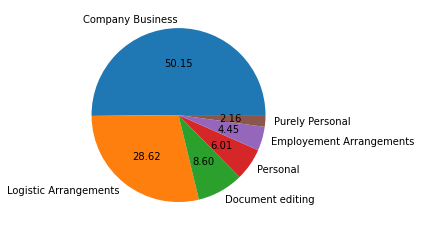

In [20]:
# checking class distribution
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(), labels=['Company Business', 'Logistic Arrangements','Document editing', 'Personal','Employement Arrangements','Purely Personal'], autopct='%0.2f')
plt.show()

### Data is Imbalanced

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
# getting number of characters 
df['num_characters'] = df['text'].apply(len)
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,Class,text,num_characters,num_words
0,2,COMPENSATION could you look into this for me?\...,617,124
1,0,"Linda Jenkins on ""Jerry's Show"" Monday fyi\n--...",1145,238
2,0,Re: Update -- Project 100 It's fine with me.\n...,912,188
3,0,Re: Senator Feinstein yes\n\n\n\n\tLinda Rober...,516,98
4,4,"FW: Friday? Krishna,\n\nFYI\n\nVince\n\n -----...",2144,449


In [24]:
# getting number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1663.00000,1663.000000,1663.000000
mean,6903.27721,1290.043295,40.431149
std,24439.43850,4562.487832,152.085676
min,9.00000,2.000000,1.000000
25%,623.00000,124.000000,4.000000
50%,1398.00000,279.000000,9.000000
75%,2867.00000,548.000000,18.000000
max,229271.00000,43340.000000,2111.000000


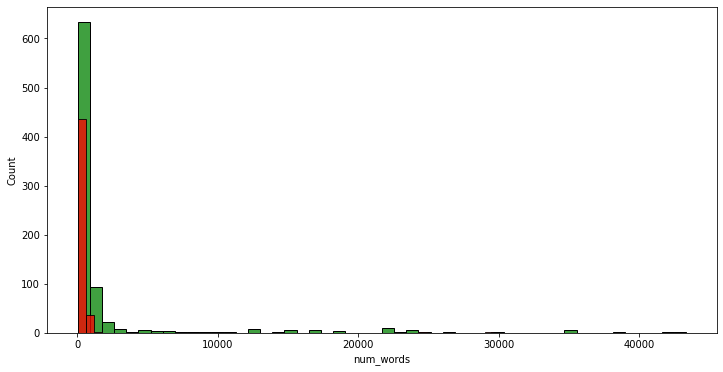

In [26]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['num_words'], color='green',bins=50)
sns.histplot(df[df['Class'] == 3]['num_words'],color='red',bins=50)

In [33]:
import string
from nltk.corpus import stopwords
import nltk
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i not in stopwords.words('english'):
            y.append(lm.lemmatize(i))        
    return " ".join(y)

In [34]:

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
import re
def preprocess(x):
    x = re.sub(r'[^a-zA-Z]',' ', x)
    # lowercasing all the words
    x = x.lower()
    # remove extra new lines
    x = re.sub(r'\n+', ' ', x)
    # removing (replacing with empty spaces actually) all the punctuations
    x = re.sub("["+string.punctuation+"]"," ", x)
    return x

In [36]:
df.loc[:,'text'] = df.loc[:,'text'].map(preprocess)

In [37]:
df.head()

,Class,text,num_characters,num_words,num_sentences
0,2,compensation could you look into this for me ...,617,124,3
1,0,linda jenkins on jerry s show monday fyi ...,1145,238,6
2,0,re update project it s fine with me ...,912,188,10
3,0,re senator feinstein yes linda robertson ...,516,98,6
4,4,fw friday krishna fyi vince origin...,2144,449,21


In [38]:
# applying lemmatization
from nltk.stem import WordNetLemmatizer 
lm = WordNetLemmatizer()
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
df.head()

,Class,text,num_characters,num_words,num_sentences,transformed_text
0,2,compensation could you look into this for me ...,617,124,3,compensation could look forwarded steven j kea...
1,0,linda jenkins on jerry s show monday fyi ...,1145,238,6,linda jenkins jerry show monday fyi forwarded ...
2,0,re update project it s fine with me ...,912,188,10,update project fine mary clark steven j kean n...
3,0,re senator feinstein yes linda robertson ...,516,98,6,senator feinstein yes linda robertson steven j...
4,4,fw friday krishna fyi vince origin...,2144,449,21,fw friday krishna fyi vince original message d...


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

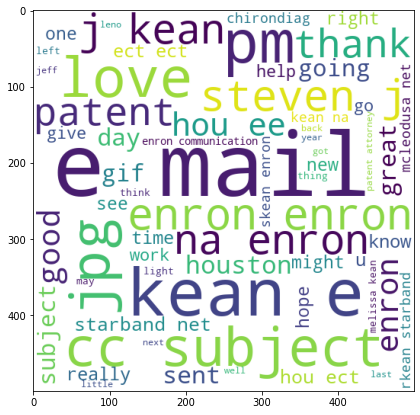

In [43]:
spam_wc = wc.generate(df[df['Class'] == 5]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,7))
plt.imshow(spam_wc)

In [46]:
company_corpus = []
for msg in df[df['Class'] == 3]['transformed_text'].tolist():
    for word in msg.split():
        company_corpus.append(word)

In [47]:
len(company_corpus)

85996

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


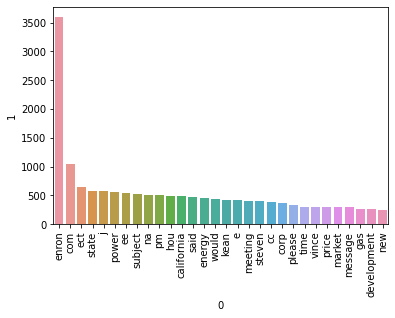

In [48]:
# counting top 30 most frequent words
from collections import Counter
sns.barplot(pd.DataFrame(Counter(company_corpus).most_common(30))[0],pd.DataFrame(Counter(company_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


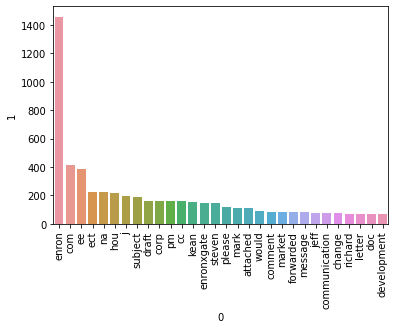

In [49]:
company_corpus = []
for msg in df[df['Class'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        company_corpus.append(word)
sns.barplot(pd.DataFrame(Counter(company_corpus).most_common(30))[0],pd.DataFrame(Counter(company_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building 

In [91]:
X=df['transformed_text']
y=df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(len(y_train))
print(len(y_test))


1330
333


In [92]:
X_train

567     return confidential material jeff doc transact...
266     challenge exercise eminent domain confidential...
148     fyi today post davis seems continue put distan...
481     west virginia settlement forwarded steven j ke...
792     proposed ad ontario market look good rosie may...
                              ...                        
1130    report power conference attended u c berkeley ...
1294    annual meeting q currently announcement schedu...
860     draft letter ferc consumer group look good poi...
1459    hoover institution news advisory conference ca...
1126    cat house lord appeal fyi forwarded steven j k...
Name: transformed_text, Length: 1330, dtype: object

In [93]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
vectorizer = TfidfVectorizer(max_features=10000)
vectortrain = vectorizer.fit_transform(X_train).toarray()
vectortrain.shape

(1330, 10000)

In [94]:
vectortest = vectorizer.transform(X_test).toarray()

In [95]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
gnb = GaussianNB()
mnb = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
bnb = BernoulliNB()

In [96]:
gnb.fit(vectortrain, y_train)
pred = gnb.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))

0.6006006006006006
                         precision    recall  f1-score   support

       Company Business       0.64      0.87      0.74       179
       Document Editing       0.29      0.27      0.28        22
Employment Arrangements       0.14      0.09      0.11        11
  Logistic Arrangements       0.62      0.35      0.45        96
               Personal       0.33      0.12      0.18        16
        Purely Personal       0.50      0.11      0.18         9

               accuracy                           0.60       333
              macro avg       0.42      0.30      0.32       333
           weighted avg       0.58      0.60      0.56       333



In [97]:
mnb.fit(vectortrain, y_train)
pred = mnb.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))

0.7027027027027027
                         precision    recall  f1-score   support

       Company Business       0.76      0.84      0.80       179
       Document Editing       0.47      0.36      0.41        22
Employment Arrangements       0.45      0.45      0.45        11
  Logistic Arrangements       0.69      0.71      0.70        96
               Personal       0.17      0.06      0.09        16
        Purely Personal       1.00      0.22      0.36         9

               accuracy                           0.70       333
              macro avg       0.59      0.44      0.47       333
           weighted avg       0.69      0.70      0.69       333



In [98]:
bnb.fit(vectortrain, y_train)
pred = bnb.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))

0.45045045045045046
                         precision    recall  f1-score   support

       Company Business       0.94      0.28      0.43       179
       Document Editing       0.21      0.18      0.20        22
Employment Arrangements       0.00      0.00      0.00        11
  Logistic Arrangements       0.37      0.99      0.54        96
               Personal       0.50      0.06      0.11        16
        Purely Personal       0.00      0.00      0.00         9

               accuracy                           0.45       333
              macro avg       0.34      0.25      0.21       333
           weighted avg       0.65      0.45      0.40       333



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf.fit(vectortrain, y_train)
pred = rf.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))


0.7087087087087087
                         precision    recall  f1-score   support

       Company Business       0.71      0.92      0.80       179
       Document Editing       0.50      0.14      0.21        22
Employment Arrangements       0.33      0.09      0.14        11
  Logistic Arrangements       0.75      0.68      0.71        96
               Personal       0.43      0.19      0.26        16
        Purely Personal       0.00      0.00      0.00         9

               accuracy                           0.71       333
              macro avg       0.45      0.33      0.36       333
           weighted avg       0.66      0.71      0.67       333



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(vectortrain, y_train)
pred = svc.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))


0.7267267267267268
                         precision    recall  f1-score   support

       Company Business       0.72      0.92      0.81       179
       Document Editing       0.40      0.09      0.15        22
Employment Arrangements       0.67      0.18      0.29        11
  Logistic Arrangements       0.77      0.76      0.76        96
               Personal       0.00      0.00      0.00        16
        Purely Personal       0.00      0.00      0.00         9

               accuracy                           0.73       333
              macro avg       0.43      0.33      0.33       333
           weighted avg       0.66      0.73      0.67       333



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200,random_state=42)
xgb.fit(vectortrain, y_train)
pred = xgb.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))

0.7447447447447447
                         precision    recall  f1-score   support

       Company Business       0.79      0.87      0.82       179
       Document Editing       0.55      0.27      0.36        22
Employment Arrangements       0.60      0.55      0.57        11
  Logistic Arrangements       0.72      0.81      0.76        96
               Personal       0.43      0.19      0.26        16
        Purely Personal       0.00      0.00      0.00         9

               accuracy                           0.74       333
              macro avg       0.51      0.45      0.46       333
           weighted avg       0.71      0.74      0.72       333



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Solving Imbalanced Dataset problem**

In [103]:

penalized = RandomForestClassifier(n_estimators = 200, 
                               class_weight='balanced', # penalize
                               random_state = 42)
# Train the model on training data
penalized.fit(vectortrain, y_train)
pred = penalized.predict(vectortest)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))

0.7267267267267268
                         precision    recall  f1-score   support

       Company Business       0.74      0.91      0.81       179
       Document Editing       0.67      0.18      0.29        22
Employment Arrangements       0.50      0.18      0.27        11
  Logistic Arrangements       0.74      0.73      0.73        96
               Personal       0.43      0.19      0.26        16
        Purely Personal       0.00      0.00      0.00         9

               accuracy                           0.73       333
              macro avg       0.51      0.37      0.39       333
           weighted avg       0.69      0.73      0.69       333



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Using Bag of words**

In [60]:
cv= CountVectorizer(ngram_range=(1,2),max_features=10000)
vectortrain1 = cv.fit_transform(X_train).toarray()
vectortest1 = vectorizer.transform(X_test).toarray()
vectortrain1.shape

(1330, 10000)

In [61]:
mnb1 = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
mnb1.fit(vectortrain1, y_train)
pred = mnb1.predict(vectortest1)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=data.target_names))

0.5345345345345346
                         precision    recall  f1-score   support

       Company Business       0.54      0.99      0.70       179
       Document Editing       0.00      0.00      0.00        22
Employment Arrangements       0.00      0.00      0.00        11
  Logistic Arrangements       0.00      0.00      0.00        96
               Personal       0.00      0.00      0.00        16
        Purely Personal       0.00      0.00      0.00         9

               accuracy                           0.53       333
              macro avg       0.09      0.17      0.12       333
           weighted avg       0.29      0.53      0.37       333



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
!pip install imblearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
!pip install nlpaug
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 7.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 8.7 MB/s 
     |████████████████████████████████| 596 kB 12.0 MB/s 
     |████████████████████████████████| 6.6 MB 11.6 MB/s 
     |████████████████████████████████| 101 kB 10.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Text Augmentation

In [64]:
import nlpaug.augmenter.word.context_word_embs as aug
augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

In [65]:
from tqdm.auto import tqdm
from sklearn.utils import shuffle
def augmentMyData(df, augmenter,t,repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['Class'] == t].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(spam_df['transformed_text'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'Class': t,
        'transformed_text': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [66]:
new_df = df.drop(labels=['text', 'num_characters','num_words','num_sentences'], axis=1)
new_df.head()

,Class,transformed_text
0,2,compensation could look forwarded steven j kea...
1,0,linda jenkins jerry show monday fyi forwarded ...
2,0,update project fine mary clark steven j kean n...
3,0,senator feinstein yes linda robertson steven j...
4,4,fw friday krishna fyi vince original message d...


In [67]:
new_df['Class'].value_counts()

0    834
3    476
1    143
4    100
2     74
5     36
Name: Class, dtype: int64

In [68]:
aug_df1 = augmentMyData(new_df, augmenter,5, samples=75)

  0%|          | 0/75 [00:00<?, ?it/s]

In [69]:
aug_df2 = augmentMyData(aug_df1, augmenter,2, samples=75)

  0%|          | 0/75 [00:00<?, ?it/s]

In [70]:
aug_df3 = augmentMyData(aug_df2, augmenter,4, samples=75)

  0%|          | 0/75 [00:00<?, ?it/s]

In [71]:
aug_df4 = augmentMyData(aug_df3, augmenter,1, samples=50)

  0%|          | 0/50 [00:00<?, ?it/s]

In [72]:
aug_df4['Class'].value_counts()

0    834
3    476
1    193
4    175
2    149
5    111
Name: Class, dtype: int64

In [73]:
aug_df4.head()

,Class,transformed_text
1112,4,usg overture dabhol thanks update john hardy e...
136,4,public policy contact california jeff steve re...
1587,0,new draft enron statement know holding later f...
798,4,doctoral study think picked two interesting in...
221,1,summer forwarded steven j kean hou ee paula ri...


In [74]:
X=aug_df4['transformed_text'].astype(str)
y=aug_df4['Class'].values
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y, test_size=0.2,random_state=42)
print(len(y_train_tf))
print(len(y_test_tf))

1550
388


In [75]:
X_train_tf

187     meet choice team team diane mark luke vicki ha...
1290    fw texas ecomm epanel jean please get touch gr...
915     question employee meeting know get someone res...
1050    comment judge wagner proposed recommendation c...
168     washington dc meet northwest delegation start ...
                              ...                        
1406    tax review california assembly bill fyi forwar...
1398    doe task force meeting plymouth going bob silv...
1237    philippe yes phillippe left join firm new york...
1876    question executive business review urgent shar...
1559    fw follow council energy advisor doubt worth t...
Name: transformed_text, Length: 1550, dtype: object

In [76]:

tf_aug = TfidfVectorizer(max_features=10000)
X_train_tf = tf_aug.fit_transform(X_train_tf).toarray()
X_test_tf = tf_aug.transform(X_test_tf).toarray()

In [77]:
X_train_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
nb = MultinomialNB(alpha=0.01)
nb.fit(X_train_tf, y_train_tf)
y_preds = nb.predict(X_test_tf)
print(accuracy_score(y_test_tf, y_preds))
print(classification_report(y_test_tf, y_preds, target_names=data.target_names))

0.7577319587628866
                         precision    recall  f1-score   support

       Company Business       0.79      0.88      0.83       172
       Document Editing       0.73      0.56      0.63        43
Employment Arrangements       0.72      0.77      0.74        30
  Logistic Arrangements       0.69      0.65      0.67        88
               Personal       0.64      0.53      0.58        34
        Purely Personal       0.95      1.00      0.98        21

               accuracy                           0.76       388
              macro avg       0.75      0.73      0.74       388
           weighted avg       0.75      0.76      0.75       388



In [79]:
rf2 = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf2.fit(X_train_tf, y_train_tf)
pred = rf2.predict(X_test_tf)
print(accuracy_score(y_test_tf, pred))
print(classification_report(y_test_tf, pred, target_names=data.target_names))

0.7938144329896907
                         precision    recall  f1-score   support

       Company Business       0.74      0.92      0.82       172
       Document Editing       1.00      0.49      0.66        43
Employment Arrangements       0.92      0.80      0.86        30
  Logistic Arrangements       0.74      0.69      0.72        88
               Personal       0.96      0.65      0.77        34
        Purely Personal       0.95      1.00      0.98        21

               accuracy                           0.79       388
              macro avg       0.89      0.76      0.80       388
           weighted avg       0.82      0.79      0.79       388



**Applying Over Resampling**

In [80]:
from sklearn.utils import resample
print(new_df['Class'].value_counts())


0    834
3    476
1    143
4    100
2     74
5     36
Name: Class, dtype: int64


In [81]:
#Separate majority and minority classes
df_1 = new_df[df['Class'] == 1]
df_majority = new_df.loc[df['Class'].isin([0, 3])]
df_4 =  new_df[df['Class'] == 4]
df_2 =  new_df[df['Class'] == 2]
df_5 =  new_df[df['Class'] == 5]


# Upsample minority class and other classes separately

df_1_up = resample(df_1, replace=True,n_samples=400,random_state=42)
df_2_up = resample(df_2, replace=True,n_samples=400,random_state=42)
df_4_up = resample(df_4, replace=True,n_samples=400,random_state=42)
df_5_up = resample(df_5, replace=True,n_samples=400,random_state=42)
 
df_upsampled = pd.concat([df_majority, df_1_up,df_2_up,df_4_up,df_5_up])
print(df_upsampled['Class'].value_counts())

Y_upsampled = df_upsampled["Class"].values

0    834
3    476
1    400
2    400
4    400
5    400
Name: Class, dtype: int64


In [82]:
df_upsampled.head()

,Class,transformed_text
1,0,linda jenkins jerry show monday fyi forwarded ...
2,0,update project fine mary clark steven j kean n...
3,0,senator feinstein yes linda robertson steven j...
6,0,confidential note portland visit david reviewe...
7,0,letter residential customer anything tell rate...


In [83]:
df_upsampled.shape

(2910, 2)

In [84]:
X_upsampled=df_upsampled['transformed_text'].astype(str)
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, Y_upsampled, test_size=0.2, random_state=20)

In [85]:
vectorizer = TfidfVectorizer(max_features=20000)

X_train_tf = vectorizer.fit_transform(X_train_upsampled).toarray()
X_train_tf.shape

(2328, 20000)

In [105]:
X_tf = vectorizer.fit_transform(X_upsampled).toarray()

In [86]:
X_test_tf = vectorizer.transform(X_test_upsampled).toarray()

In [104]:
nb = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
nb.fit(X_train_tf, y_train_upsampled)
y_preds = nb.predict(X_test_tf)
print(accuracy_score(y_test_upsampled, y_preds))
print(classification_report(y_test_upsampled, y_preds, target_names=data.target_names))


0.8487972508591065
                         precision    recall  f1-score   support

       Company Business       0.84      0.77      0.80       173
       Document Editing       0.82      0.92      0.87        89
Employment Arrangements       0.91      1.00      0.95        71
  Logistic Arrangements       0.67      0.69      0.68        89
               Personal       0.92      0.86      0.89        94
        Purely Personal       1.00      1.00      1.00        66

               accuracy                           0.85       582
              macro avg       0.86      0.87      0.86       582
           weighted avg       0.85      0.85      0.85       582



In [107]:
# Cross validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_tf, Y_upsampled, cv=10, scoring='f1_macro')
print(scores)

[0.86846374 0.83666979 0.88029325 0.89085486 0.86495774 0.90017898
 0.86616327 0.90242259 0.89182088 0.84536968]


In [88]:
rf3 = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf3.fit(X_train_tf, y_train_upsampled)
pred = rf3.predict(X_test_tf)
print(accuracy_score(y_test_upsampled, pred))
print(classification_report(y_test_upsampled, pred, target_names=data.target_names))

0.8969072164948454
                         precision    recall  f1-score   support

       Company Business       0.82      0.88      0.85       173
       Document Editing       0.92      0.92      0.92        89
Employment Arrangements       0.99      1.00      0.99        71
  Logistic Arrangements       0.78      0.69      0.73        89
               Personal       0.98      0.96      0.97        94
        Purely Personal       1.00      1.00      1.00        66

               accuracy                           0.90       582
              macro avg       0.91      0.91      0.91       582
           weighted avg       0.90      0.90      0.90       582



In [108]:
# cross validation
scores = cross_val_score(rf3, X_tf, Y_upsampled, cv=10, scoring='f1_macro')
print(scores)

[0.91699677 0.91180358 0.91984141 0.90319162 0.89285009 0.9137413
 0.8976083  0.93659531 0.91512704 0.89810916]
